<a href="https://colab.research.google.com/github/MatteoBettini/Stock-Market-Prediction-2020/blob/main/notebooks/Data%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Take-home Assessment

# Imports

In [403]:
# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# To make this notebook's output stable across runs
np.random.seed(42)

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams["savefig.dpi"] = 300

plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [404]:
"""
from google.colab import drive
drive.mount('/content/drive')

ax = nasdaq_df.plot(y=["Close"])

fig = ax.get_figure()
fig.savefig('/content/drive/My Drive/Stock_market_figures/close.png')
"""

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n\nax = nasdaq_df.plot(y=["Close"])\n\nfig = ax.get_figure()\nfig.savefig(\'/content/drive/My Drive/Stock_market_figures/close.png\')\n'

# Dataset exploration

In this section we will upload and explore the dataset "**Processed_NASDAQ**",  containing several daily features of NASDAQ Composite from 2010 to 2017. The dataset was acquired from [this repository](https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables#).

It covers features from various categories of technical indicators, future contracts, price of commodities, important indices of markets around the world, price of major companies in the U.S. market, and treasury bill rates. Sources and thorough description of features have been mentioned in the paper "[CNNpred: CNN-based stock market prediction using a diverse set of variables](https://arxiv.org/pdf/1810.08923.pdf)".

## 1 - Loading the dataset

In [405]:
nasdaq_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NASDAQ.csv?token=ANHXQQK4VPBE6ABSBCHTF5K74UP3W'
dji_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_DJI.csv?token=ANHXQQOXYQZSSSTVFKX6RZS74XDXA'
nyse_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_NYSE.csv?token=ANHXQQNAISMPCLVLRTGNJBC74XD2C'
russel_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_RUSSELL.csv?token=ANHXQQPGLBLSM3B36OLWIPC74XD3U'
s_p_url = 'https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/stock_markets_datasets/Processed_S%26P.csv?token=ANHXQQNRFS3NKP2XCF5Q5MS74XD5K'

In [406]:
nasdaq_df = pd.read_csv(nasdaq_url, parse_dates=["Date"], index_col="Date")
# Dataset is now stored in a Pandas Dataframe

We load the .csv file telling pandas to parse the date column and to use it to index the data.

## 2 - Exploring the dataset

Now that we have loaded the dataset we can start inspecting the data.

In [407]:
nasdaq_df.head(10)

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,NaN,NaN,5.33,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,NASDAQ,0.35,-0.13,0.15,0.09,0.10,0.48,-1.19,-0.12,0.27,0.34,1.68,-0.07,-0.96,-2.40,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,0.026830,0.000000,5.35,6.39,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,NaN,NaN,0.016043,NaN,...,0.019733,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,NASDAQ,1.73,2.81,1.99,1.36,2.71,0.96,1.28,0.61,1.74,2.05,-0.52,0.54,1.51,5.60,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,0.002699,0.001560,5.24,6.30,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,0.020909,...,0.003839,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,NASDAQ,-0.08,0.59,-0.11,0.24,0.32,-0.14,-0.04,-0.31,0.38,0.04,2.03,-0.18,-0.08,-4.20,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,2301.090088,-0.048364,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.06,0.15,2.60,3.85,0.016883,0.006009,5.30,6.34,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,0.006153,...,0.003104,3.82,3.79,3.70,0.03,0.12,1.04,2.49,6.19,6.28,6.31,-0.117647,0.000000,0.015625,NASDAQ,0.91,1.61,0.15,2.41,1.72,-0.01,0.01,0.31,0.16,1.59,0.79,0.78,-0.36,6.60,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,2300.050049,0.007416,-0.000452,-0.003300,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.16,2.62,3.85,-0.006256,0.000221,5.31,6.33,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,-0.006567,...,0.002200,3.83,3.80,3.69,0.03,0.14,1.02,2.48,6.17,6.28,6.31,0.066667,0.019802,0.007692,NASDAQ,-0.41,-0.46,0.15,-1.90,-0.63,-0.12,0.28,-0.66,0.06,-0.25,-0.60,-1.27,-0.05,-3.38,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58
2010-01-08,2317.169922,-0.054915,0.007443,-0.000452,-0.003300,0.000126,2.116212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.05,0.15,2.57,3.83,0.001695,-0.003097,5.32,6.32,0.005656,-0.007817,-0.004062,-0.000044,0.006648,0.027077,0.021538,0.003438,-0.002456,0.006897,-0.009269,-0.004012,0.005054,0.001357,0.003032,0.002882,0.001226,...,0.004249,3.81,3.78,3.68,0.03,0.13,1.00,2.49,6.17,6.27,6.30,-0.062500,-0.067961,-0.019084,NASDAQ,0.88,-0.17,0.53,-0.70,0.11,0.27,0.20,0.66,0.02,0.45,0.06,0.43,0.67,-0.98,1.03,0.61,0.68,0.64,0.35,-0.98,-0.58,-0.56,2.07,1.26,0.38
2010-01-11,2312.409912,-0.031463,-0.002054,0.007443,-0.000452,-0.003300,0.172845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.04,0.13,2.58,3.85,-0.002417,0.023297,5.35,6.32,0.005543,-0.006130,0.003884,-0.000147,-0.008822,-0.024041,0.009639,0.000156,-0.003357,-0.012720,-0.002079,0.011220,-0.000507,0.000705,0.000479,0.001747,0.005147,...,0.003192,3.84,3.81,3.72,0.03,0.

Taking a peak at the first ten elements we can already see that there are a lot of missing values. They will be treated accordingly in the section regarding data transofrmations.


We can also see that the dates inculuded in the dataset are referring only to working days as the stock market is open only on those days.

We can get a confirmation of this by looking at the following rows where we see that 16,17 January 2010 are not present because it was a weekend and 18 January 2010 is not present because of the federal U.S. festivity of "Martin Luther King Jr. Day".

This is not a problem for our machine leraning pipeline as we will map the 'Date' feature into a categorical feature representing the day of the week.
More information on this will be provided in the section about data transformation.

In [408]:
nasdaq_df.iloc[9:13]

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-14,2316.739990,-0.027683,0.003830,0.011212,-0.013017,-0.002054,0.725634,NaN,NaN,NaN,2302.394971,NaN,NaN,NaN,0.02,0.05,0.14,2.51,3.76,-0.003892,0.009758,5.17,6.22,0.002941,-0.001816,-0.007179,0.000029,-0.005792,-0.013632,-0.007724,0.002001,0.009943,0.020099,0.014346,0.000144,0.003727,0.004513,0.004316,0.002426,-0.001455,...,0.002474,3.74,3.71,3.62,0.03,0.12,1.05,2.46,6.08,6.17,6.20,-0.066667,-0.030928,-0.015686,NASDAQ,0.82,-0.63,0.36,-0.35,-0.33,0.33,0.33,-0.06,0.36,0.55,-0.60,1.14,0.31,-2.53,1.59,0.27,0.57,0.76,0.33,0.12,-0.13,-0.16,-1.49,0.32,0.39
2010-01-15,2287.989990,0.170174,-0.012410,0.003830,0.011212,-0.013017,-1.259292,0.830271,NaN,NaN,2299.775883,NaN,NaN,NaN,0.03,0.06,0.15,2.44,3.70,-0.017517,-0.009005,5.12,6.18,-0.003921,-0.005665,0.005472,0.000000,-0.016712,-0.001649,-0.015569,-0.008295,-0.022600,-0.003230,-0.031390,-0.008180,-0.015287,-0.007784,-0.018853,-0.010823,-0.002891,...,-0.012315,3.67,3.64,3.55,0.03,0.12,1.06,2.48,6.03,6.12,6.15,0.071429,-0.053191,-0.027888,NASDAQ,-0.94,-0.91,-0.53,-0.62,-1.75,-1.89,-0.94,-0.81,-0.83,-1.09,-0.43,0.38,-1.38,1.84,0.73,-0.55,-1.24,-1.42,-1.14,0.64,0.77,0.77,-3.27,-1.45,-1.08
2010-01-19,2320.399902,-0.224614,0.014165,-0.012410,0.003830,0.011212,0.345527,0.518969,NaN,NaN,2303.525705,NaN,NaN,NaN,0.03,0.06,0.14,2.48,3.73,0.013084,0.004433,5.22,6.21,0.005333,0.004948,0.002624,-0.000029,0.044238,0.003697,0.006083,0.012237,-0.009158,0.007777,0.007123,0.002315,0.013982,0.010577,0.017105,0.012500,0.001100,...,0.011811,3.70,3.67,3.59,0.03,0.11,0.99,2.48,6.07,6.15,6.18,-0.066667,0.044944,0.016393,NASDAQ,-0.17,0.69,0.79,0.50,1.31,0.91,0.59,-0.59,0.35,0.85,0.52,0.16,1.48,-2.35,-0.74,-0.95,0.49,1.54,1.19,0.89,0.58,0.57,-2.08,0.70,0.45
2010-01-20,2291.250000,0.149905,-0.012562,0.014165,-0.012410,0.003830,0.391706,-0.756265,NaN,NaN,2301.293759,NaN,NaN,NaN,0.03,0.05,0.14,2.45,3.68,-0.019752,-0.011253,5.24,6.16,-0.003586,-0.000077,0.013085,0.000073,-0.015392,-0.014341,-0.002418,-0.003060,0.002773,-0.016399,-0.016266,-0.017901,-0.020131,-0.016742,-0.020907,-0.010598,-0.018074,...,-0.015295,3.65,3.63,3.54,0.02,0.11,0.92,2.48,6.02,6.11,6.13,0.000000,-0.010753,-0.012097,NASDAQ,-1.73,-1.69,-2.06,-2.65,-1.77,-2.08,-1.06,-1.40,-1.72,-2.40,-2.02,0.00,-1.20,-1.10,-0.46,-1.64,-4.89,-1.30,-1.03,1.05,1.09,1.08,-2.08,-4.69,-2.32


### Features

The datasets described in [the paper](https://arxiv.org/pdf/1810.08923.pdf) contain 1984 entries, each representing a day of trading in a stock market. Each entry has 82 features which are grouped in the following way:

*   Primitive features
*   Technical indicators
*   Economic data
*   World stock markets
*   The exchange rate of U.S. dollar
*   Commodities
*   Big U.S. Companies
*   Futures contracts

The authors have made available five datasets, each representing a different stock market. The available markets are: S&P 500, NASDAQ Composite, Dow Jones Industrial Average, RUSSELL 2000, and NYSE Composite. In this work we will explore and analyse the NASDAQ Composite dataset, but all the insights we are going to gain will be valid for all datasets.

The primitive featrues and the technical indicators are unique for each dataset, while all the other features are common among datasets.

A tabular description of the features is also reported in the following images.

<img src="https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/feature_description/feature_table_1.png?token=ANHXQQI7BINXDEPRGLZ42LS74XAH6" width="2000">
<img src="https://raw.githubusercontent.com/MatteoBettini/Stock-Market-Prediction-2020/main/feature_description/feature_table_2.png?token=ANHXQQOG2ZP4BPHXIWXNWWK74XAKY" width="2000">

Let's reorder the features in our data frame to match the description.

In [409]:
technical_indeces = ["Volume","mom","mom1","mom2","mom3","ROC_5","ROC_10","ROC_15","ROC_20","EMA_10","EMA_20","EMA_50","EMA_200"]
economic_indices = ["DTB4WK","DTB3","DTB6","DGS5","DGS10","DAAA","DBAA","TE1","TE2","TE3","TE5","TE6","DE1","DE2","DE4","DE5","DE6","CTB3M","CTB6M","CTB1Y"]
comodities_indices = ["Oil","Brent","WIT-oil","Gold","gold-F","XAU","XAG","GAS-F","silver-F","copper-F","wheat-F"]
word_indices = ["GSPC","DJI","NYSE","RUT","HSI","SSEC","FCHI","FTSE","GDAXI"]
exchannge_indices = ["JPY","GBP","CAD","CNY","AUD","NZD","CHF","EUR","Dollar index","Dollar index-F"]
companies_indices = ["XOM","JPM","AAPL","MSFT","GE","JNJ","WFC","AMZN"]
futures_indices = ["CAC-F","FTSE-F","DAX-F","HSI-F","Nikkei-F","KOSPI-F","NASDAQ-F","DJI-F","S&P-F","RUSSELL-F"]


nasdaq_df = nasdaq_df[["Name","Close"] +
                       technical_indeces +
                       economic_indices +
                       comodities_indices +
                       word_indices +
                       exchannge_indices +
                       companies_indices +
                       futures_indices]

By looking at the info of the NASDAQ dataset we can see features, their types and the number of non-null values.

In [410]:
nasdaq_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1984 entries, 2009-12-31 to 2017-11-15
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1983 non-null   float64
 3   mom             1983 non-null   float64
 4   mom1            1982 non-null   float64
 5   mom2            1981 non-null   float64
 6   mom3            1980 non-null   float64
 7   ROC_5           1979 non-null   float64
 8   ROC_10          1974 non-null   float64
 9   ROC_15          1969 non-null   float64
 10  ROC_20          1964 non-null   float64
 11  EMA_10          1975 non-null   float64
 12  EMA_20          1965 non-null   float64
 13  EMA_50          1935 non-null   float64
 14  EMA_200         1785 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6           

If we analyze carefully the features availaible in the actual dataset we may notice a few differences from those described in the paper.

Apart from the fact that the same feature may have different names in the two descriptions, in the loaded dataset we may find two **new** features:

| # | Feature | Description | Type |
| --- | --- | --- | --- |
| 83 | mom | Return of 1 day before | Technical indicator |
| 84| wheat-F | Relative change of wheat price| Comodity |

The features descriptions and types come from my best intution, as I could not find any detailed description ot these two features.

In each market's dataset we may also see that there is a featrure indicating the name of the market from where the data comes.



In [411]:
nasdaq_df["Name"].value_counts()

NASDAQ    1984
Name: Name, dtype: int64

For now we are considering only one market so we can drop this feature.

In [412]:
nasdaq_df.drop(labels=["Name"], axis=1, inplace=True)

<a name="return_equation_cell"/>

Lastly, **mom** represents the return of 1 day before at time $t$. So among the features IXIC, GSPC, DJI, NYSE and RUSSEL, the one referring to the market from where the dataset is from is dropped as the same data is contained in **mom**.
 
The return of a market (mom) at time $t$ can be computed from the "Close" feature as $$Return_{t} = \frac{Close_{t}}{Close_{t-1}} - 1$$

For example, in our dataset *Processed_NASDAQ* the feature IXIC is not present.

Therefore, we can understand why in our data frame we have 84 columns: Date (which is the index) and 83 features. This is the result of the addition of "mom", "wheat-F" and "Name" to the 82 features described in the paper considering the absence of one feature among IXIC, GSPC, DJI, NYSE and RUSSEL.

All features are floats except for Date (that has been parsed as datetime64) and Name that is a string.

---

We also want to insert the feature describing the day of the week.

We do this in the following way:

In [413]:
nasdaq_df.insert(0,'day_of_week',nasdaq_df.index.dayofweek)

In [414]:
nasdaq_df.head(3)

,day_of_week,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Oil,Brent,WIT-oil,Gold,gold-F,...,silver-F,copper-F,wheat-F,GSPC,DJI,NYSE,RUT,HSI,SSEC,FCHI,FTSE,GDAXI,JPY,GBP,CAD,CNY,AUD,NZD,CHF,EUR,Dollar index,Dollar index-F,XOM,JPM,AAPL,MSFT,GE,JNJ,WFC,AMZN,CAC-F,FTSE-F,DAX-F,HSI-F,Nikkei-F,KOSPI-F,NASDAQ-F,DJI-F,S&P-F,RUSSELL-F
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,3,2269.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.06,0.20,2.69,3.85,5.33,6.39,3.81,3.79,3.65,0.02,0.16,1.06,2.54,6.19,6.33,6.35,NaN,NaN,NaN,NaN,-0.13,0.10,NaN,0.34,...,0.26,0.09,-0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.35,0.03,-0.11,-0.12,-0.06,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15,0.27,0.48,1.68,0.67,-0.07,-0.96,-1.19,-1.00,-1.08
2010-01-04,0,2308.419922,0.560308,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.08,0.18,2.65,3.85,5.35,6.39,3.80,3.77,3.67,0.03,0.13,1.04,2.54,6.21,6.31,6.34,-0.100000,-0.043860,-0.014870,0.026830,2.81,2.71,0.00000,2.05,...,3.26,1.36,3.12,0.016043,0.014951,0.019733,0.023521,NaN,NaN,0.019724,NaN,NaN,-0.004467,-0.004222,-0.010644,-0.001991,1.73,1.52,-0.57,0.61,-0.42,-0.59,0.014078,0.028318,0.015565,0.015420,0.021150,0.004192,0.012227,-0.004609,1.99,1.74,0.96,-0.52,0.31,0.54,1.51,1.28,1.62,1.61
2010-01-05,1,2308.709961,0.225994,0.000126,0.017306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.07,0.17,2.56,3.77,5.24,6.30,3.74,3.70,3.60,0.04,0.14,1.06,2.53,6.13,6.23,6.27,-0.055556,-0.073394,-0.033962,0.002699,0.59,0.32,0.00156,0.04,...,1.96,0.24,-0.90,0.003116,-0.001128,0.003839,-0.002515,0.020909,0.011844,-0.000264,0.004036,-0.002718,-0.009838,-0.007628,-0.001441,0.000015,-0.08,-0.07,0.43,-0.31,0.12,0.03,0.003904,0.019370,0.001729,0.000323,0.005178,-0.011596,0.027452,0.005900,-0.11,0.38,-0.14,2.03,0.47,-0.18,-0.08,-0.04,0.31,-0.20


In [415]:
nasdaq_df["day_of_week"].value_counts()

2    408
1    407
3    401
4    397
0    371
Name: day_of_week, dtype: int64

In [416]:
nasdaq_df.describe()

,day_of_week,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Oil,Brent,WIT-oil,Gold,gold-F,...,silver-F,copper-F,wheat-F,GSPC,DJI,NYSE,RUT,HSI,SSEC,FCHI,FTSE,GDAXI,JPY,GBP,CAD,CNY,AUD,NZD,CHF,EUR,Dollar index,Dollar index-F,XOM,JPM,AAPL,MSFT,GE,JNJ,WFC,AMZN,CAC-F,FTSE-F,DAX-F,HSI-F,Nikkei-F,KOSPI-F,NASDAQ-F,DJI-F,S&P-F,RUSSELL-F
count,1984.000000,1984.000000,1983.000000,1983.000000,1982.000000,1981.000000,1980.000000,1979.000000,1974.000000,1969.000000,1964.000000,1975.000000,1965.000000,1935.000000,1785.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1983.000000,1983.000000,1984.000000,1984.000000,1983.000000,1984.000000,...,1984.000000,1984.000000,1982.000000,1983.000000,1983.000000,1983.000000,1983.000000,1814.000000,1746.000000,1944.000000,1913.000000,1917.000000,1505.000000,1506.000000,1501.000000,1505.000000,1984.00000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1980.000000,1978.000000,1980.000000,1909.000000,1984.000000,1905.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,2.023185,3965.459844,0.019092,0.000603,0.000605,0.000607,0.000607,0.298402,0.592334,0.890409,1.193793,3962.942659,3960.449393,3953.861264,3933.656598,0.160660,0.190781,0.261265,1.454607,2.357228,4.098523,5.071033,2.196568,2.166447,2.095963,0.030121,0.100605,0.972510,2.713805,4.809768,4.880252,4.910373,-0.001673,-0.006113,-0.007198,-0.000453,0.015257,0.004945,-0.020158,0.022208,...,-0.047314,-0.000141,-0.014743,0.000464,0.000443,0.000316,0.000511,0.000226,-0.000005,0.000207,0.000194,0.000486,0.000283,-0.000019,0.000016,-0.000028,-0.00557,-0.001507,-0.002268,-0.006174,0.010338,0.010726,0.000155,0.000568,0.000999,0.000604,0.000188,0.000426,0.000468,0.001266,0.020717,0.016603,0.039303,0.022666,0.044279,0.021816,0.062853,0.042334,0.043674,0.063634
std,1.398604,1245.321969,0.245713,0.010564,0.010566,0.010568,0.010571,2.275964,3.012111,3.643972,4.106765,1237.248608,1228.537683,1204.070828,1095.269977,0.245119,0.272557,0.298717,0.485540,0.603573,0.637084,0.708687,0.665357,0.677706,0.695124,0.046693,0.083104,0.260059,0.459884,0.845493,0.832982,0.817915,0.143203,0.101676,0.093435,0.030872,1.920643,2.070563,0.141000,1.317282,...,1.944127,1.415230,1.935339,0.009335,0.008681,0.009772,0.012767,0.011606,0.014315,0.013145,0.009689,0.012619,0.006300,0.005473,0.005235,0.001858,0.71068,0.752757,0.742651,0.598391,0.495002,0.483800,0.011574,0.016494,0.016017,0.014091,0.013668,0.008728,0.015553,0.019738,1.307374,0.955724,1.229589,1.190320,1.347234,1.025523,1.042482,0.859720,0.942540,1.254398
min,0.000000,2091.790039,-1.000000,-0.068994,-0.068994,-0.068994,-0.068994,-14.097455,-17.064517,-15.392485,-18.083971,2148.872451,2177.216009,2211.780049,2292.884849,-0.030000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.270000,-0.190000,0.000000,-2.400000,-1.340000,-1.210000,-1.030000,-1.000000,-1.000000,-1.000000,-1.000000,-8.570000,-8.670000,-1.000000,-9.350000,...,-17.750000,-7.250000,-11.060000,-0.066634,-0.055464,-0.070507,-0.089095,-0.066010,-0.084909,-0.080425,-0.046673,-0.068233,-0.031467,-0.027657,-0.018905,-0.011837,-3.79000,-4.120000,-15.760000,-2.620000,-4.280000,-2.390000,-0.061882,-0.094149,-0.123558,-0.113995,-0.071742,-0.032696,-0.090440,-0.126568,-8.080000,-4.830000,-6.630000,-7.390000,-8.670000,-6.180000,-6.810000,-5.930000,-7.220000,-7.540000
25%,1.000000,2814.597473,-0.077510,-0.004070,-0.004033,-0.004044,-0.004057,-0.861425,-1.027999,-1.026613,-0.949301,2807.049553,2802.925899,2791.168135,2844.183492,0.020000,0.030000,0.080000,1.110000,1.940000,3.710000,4.660000,1.687500,1.660000,1.6000

This gives us some information on how the data are distributed. NaN values are excluded.

## 3 - Plotting the time series

The data in this dataset are representing a **time series**.

This is not the typical dataset for a supervised learning prediction, so we will have to modify some things in order to apply the supervised learning algorithms we know. This will be done in the following sections.

But first, let's see the evoultion over time of the close price of the NASDAQ market.

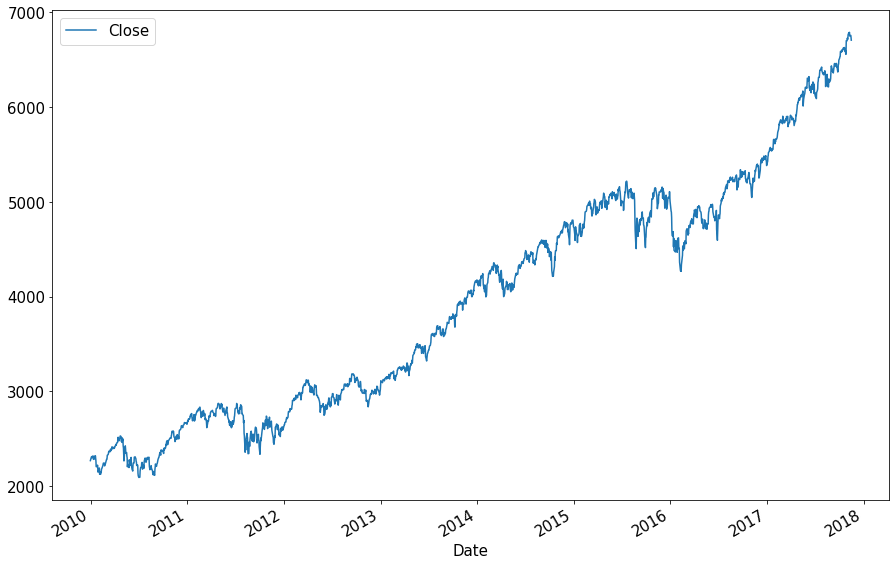

In [417]:
ax = nasdaq_df.plot(y=["Close"])

We can also plot the returns for all the markets.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2ab88bac8>,
      dtype=object)

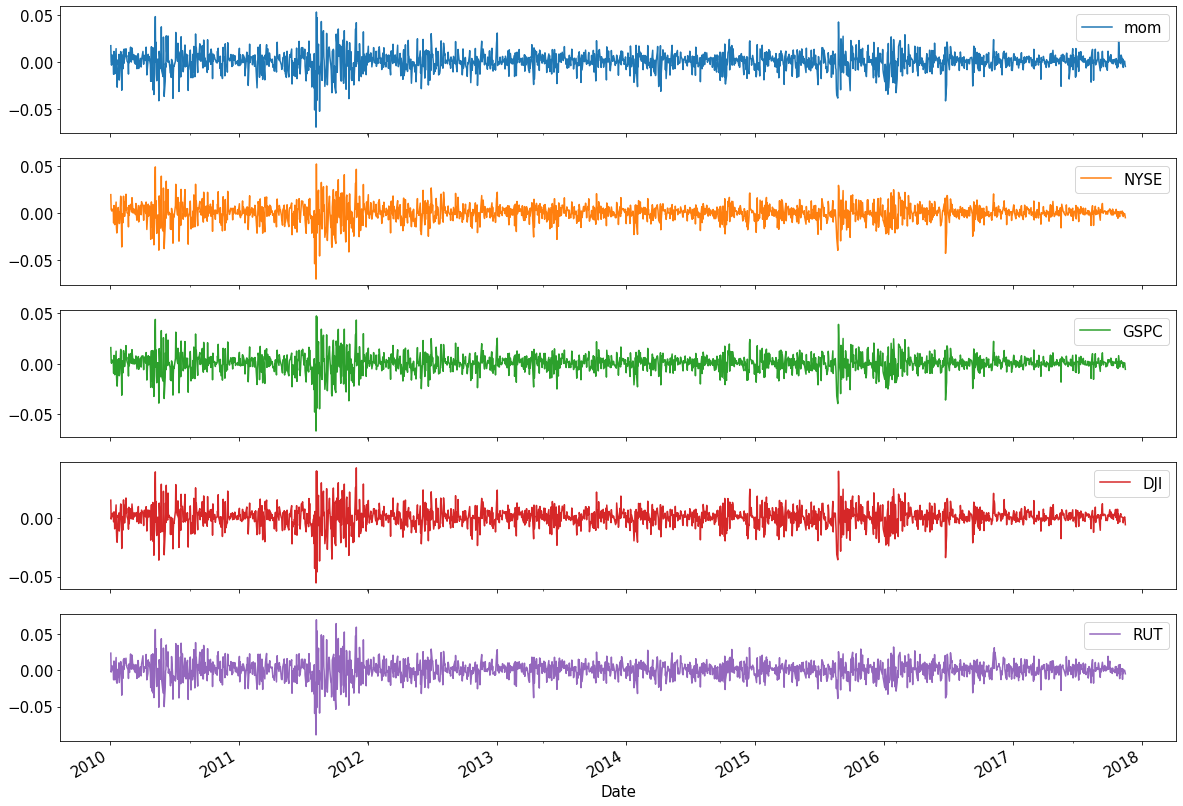

In [418]:
nasdaq_df.plot(y=["mom","NYSE","GSPC","DJI","RUT"], subplots=True, figsize=(20,15))

We can see that there are some common trends.

One example is the big oscillation we can observe between 2011 and 2012

---

Another interesting aspect to look into is the comparison of Nasdaq return among the different years.

As for different years we may have a different number of data points, here we compare only the years that have the same amount of data points and for which the amount corresponds to the maximum.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2ab66ef60>,
      dtype=object)

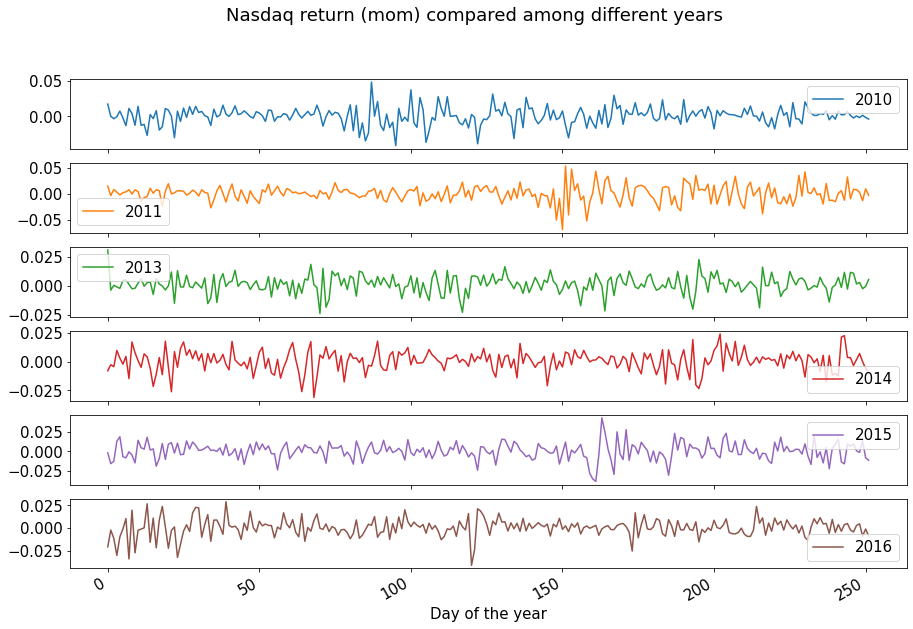

In [419]:
groups = nasdaq_df["mom"].groupby(pd.Grouper(freq='A'))

max_size = 0
for _, group in groups:
    if group.values.shape[0] > max_size:
        max_size = group.values.shape[0]

years = pd.DataFrame()
for name, group in groups:
    if group.values.shape[0] == max_size:
        years[name.year] = group.values

years.plot(subplots=True, xlabel="Day of the year", title="Nasdaq return (mom) compared among different years")

Apart from some common trends between 2013 and 2014, there are no major similarities between different years.

This gives us an intuition that return depends more on other features rather than time of the year.

---

Here we report also a whisker plot for the return of NASDAQ over the years.

This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

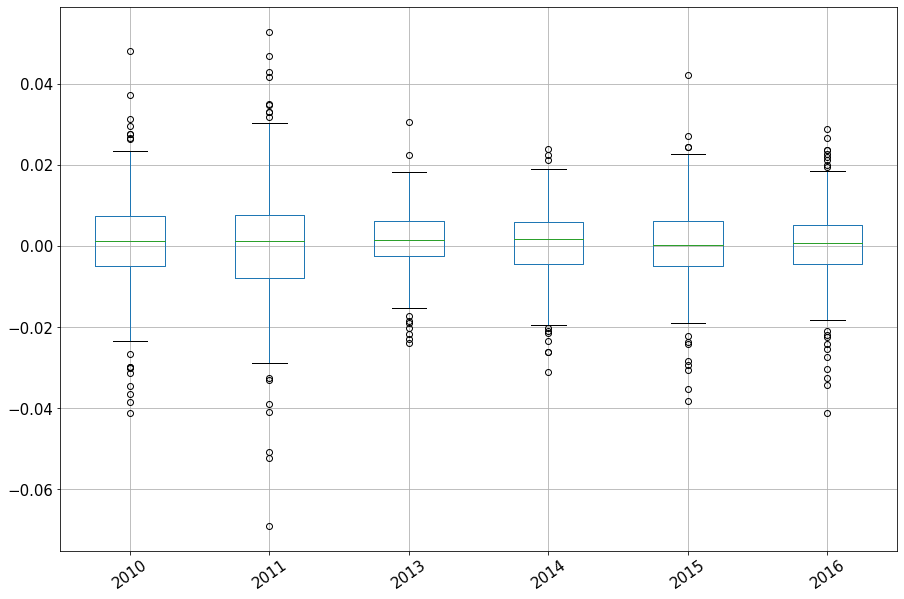

In [420]:
years.boxplot(rot=35)

Another interesting plot to visualize is the distribution of the featrues, we can look at this by plotting an histogram for each feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2a94634a8>,
      dtype=object)

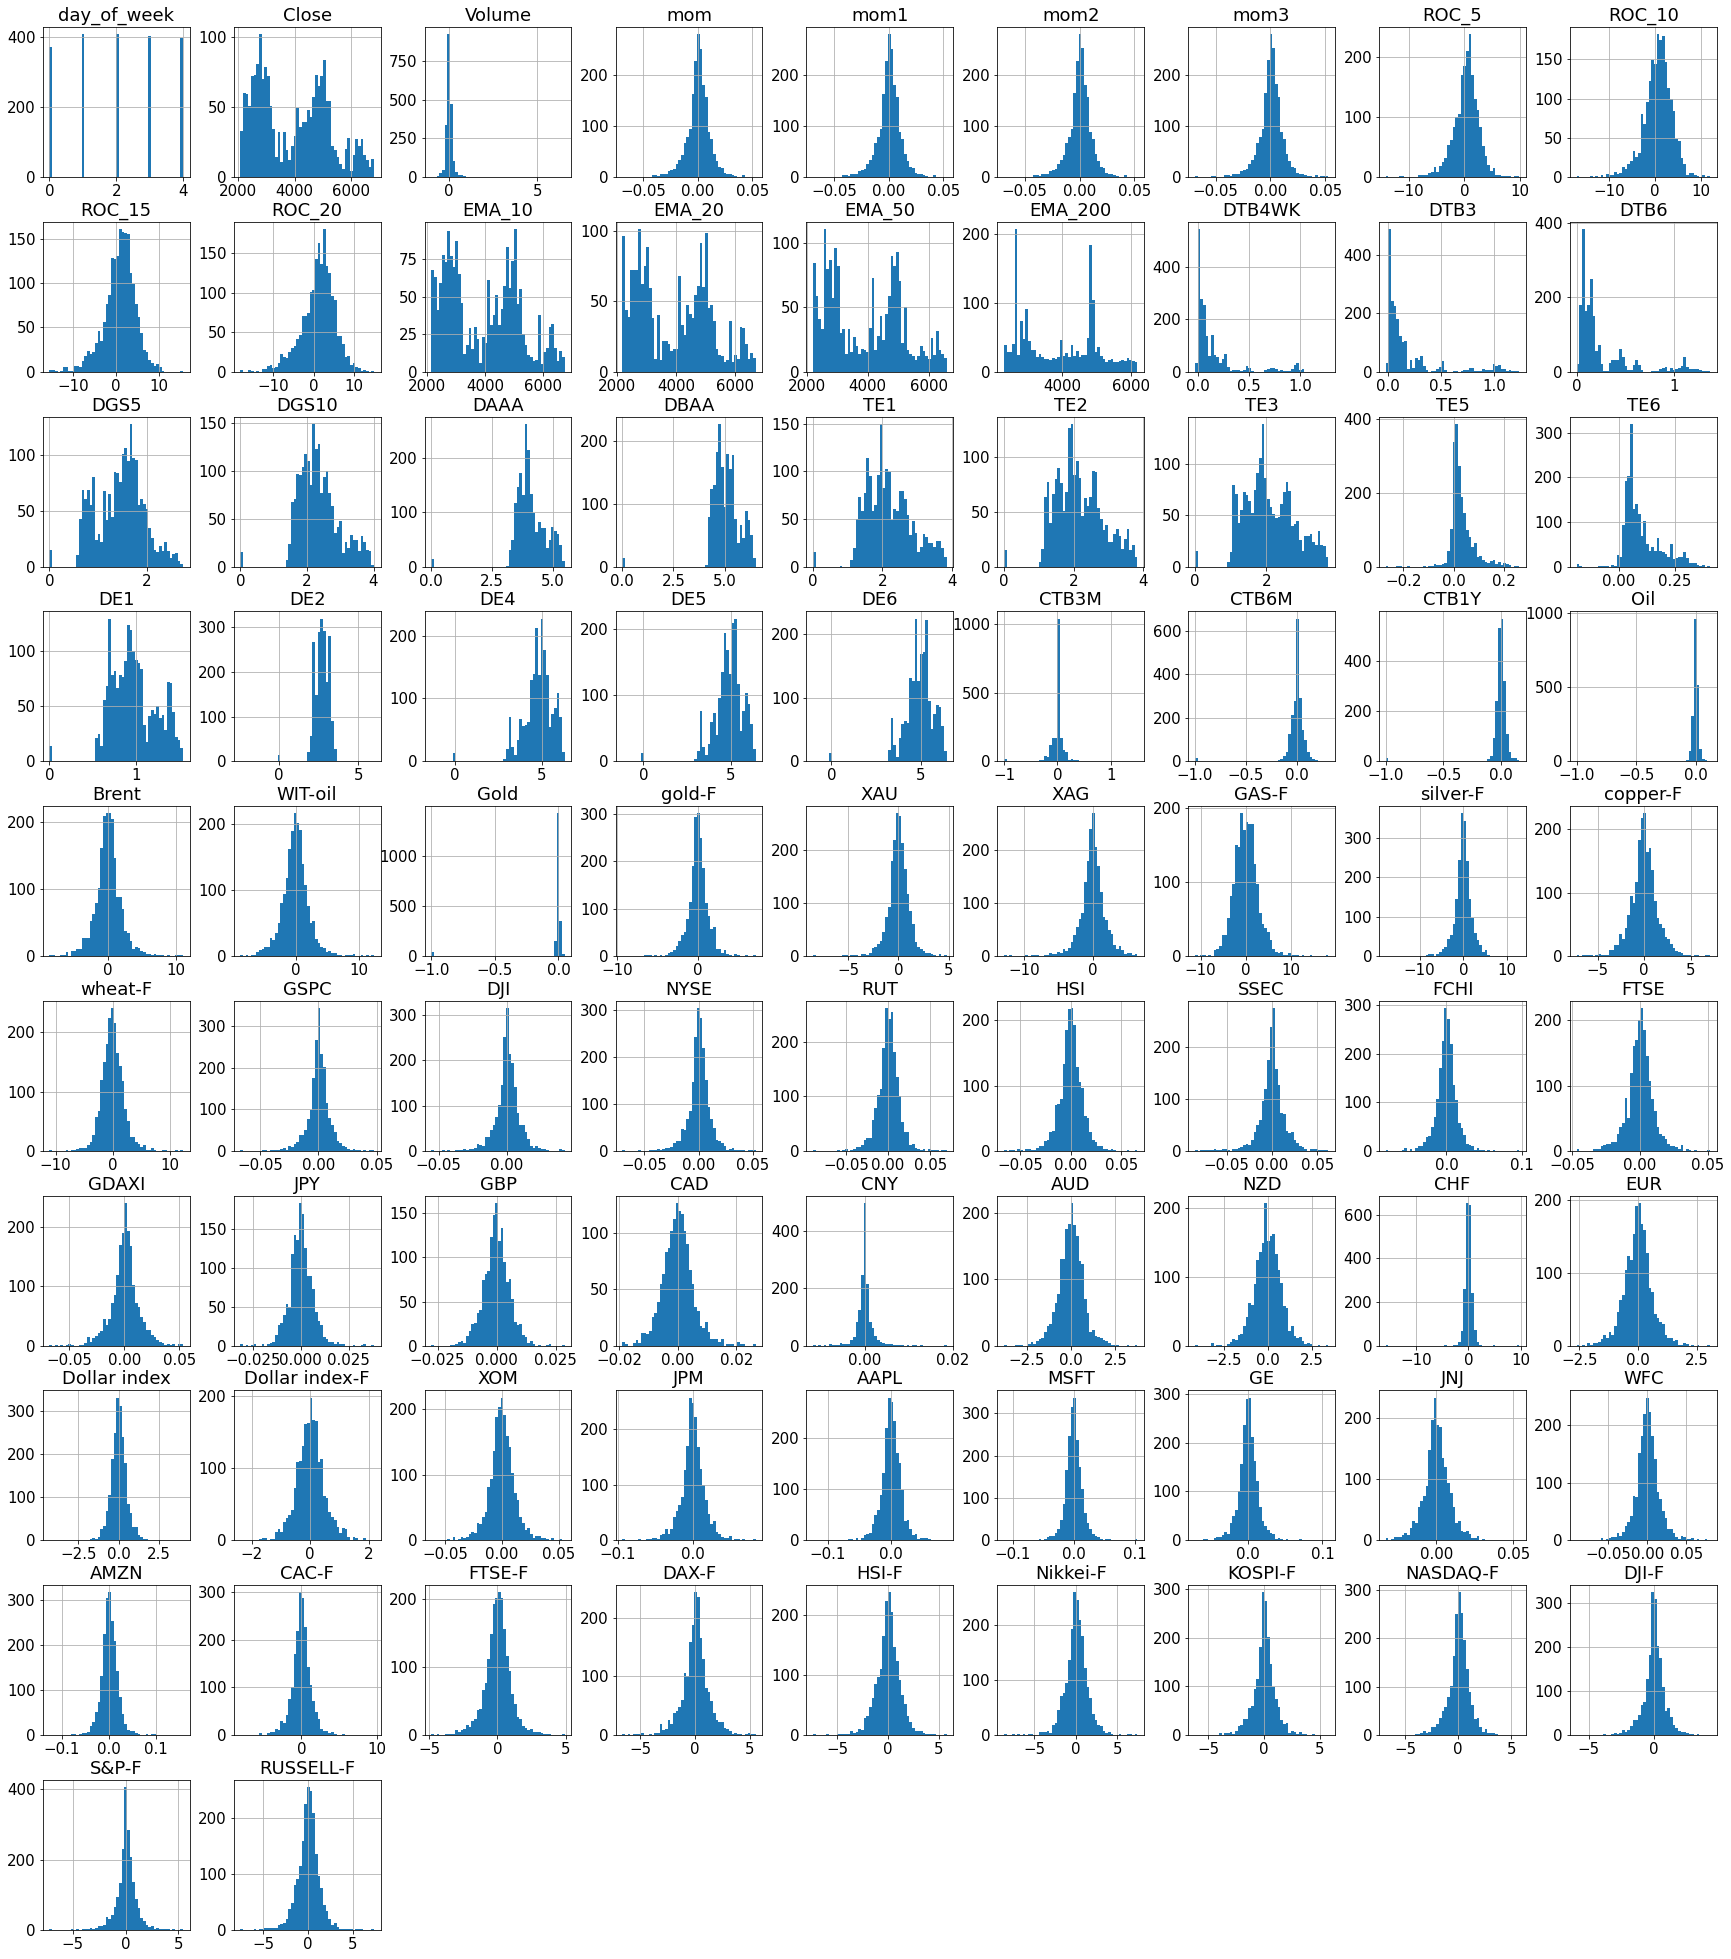

In [453]:
#nasdaq_df.hist(figsize=(30,35), bins=50)

We see that a great part of the features is distributed as a gaussian centered in 0.

---

## 4 - Splitting the data: training, validation and test

As already mentioned, our dataset represents a time series. Therefore, random or stratified train/test split strategies cannot be used as they would not enable the machine learning algorithm to benefit from the fact that the data are temporally correlated with each other.

Given this considerations, the only possibility we have is to split the dataset in the most traditional way:

*   The first 60% on the entries will form the **training set**
*   The subsequent 20% will form the **validation set**
*   The last 20% will form the **test set**

Before performing the split we also compute the target vector, for each entry, the target is 1 if there is an increase in the Close price in the following entry and 0 otherwise.

$$ Target_{t} = \begin{cases} 1, & \mbox{if } Close_{t+1}>Close_{t} \\ 0, & \mbox{else} \end{cases}$$

In [422]:
target_df =  nasdaq_df["Close"].shift(-1) - nasdaq_df["Close"]
target = np.where(target_df.values > 0, 1, 0)
target_df = pd.DataFrame(target[:-1]) # We have to remove the last value as we have no target for it

target_df.shape

(1983, 1)

In [423]:
nasdaq_df = nasdaq_df.iloc[:-1,:] # We have to remove the last value as we have no target for it

nasdaq_train = nasdaq_df[:int(nasdaq_df.shape[0]*0.6)]
nasdaq_train_y = target_df[:int(target_df.shape[0]*0.6)]

nasdaq_val = nasdaq_df[int(nasdaq_df.shape[0]*0.6):int(nasdaq_df.shape[0]*0.8)]
nasdaq_val_y = target_df[int(target_df.shape[0]*0.6):int(target_df.shape[0]*0.8)]

nasdaq_test =  nasdaq_df[int(nasdaq_df.shape[0]*0.8):]
nasdaq_test_y = target_df[int(target_df.shape[0]*0.8):]

In [424]:
print(nasdaq_train.shape, nasdaq_train_y.shape,
      nasdaq_val.shape, nasdaq_val_y.shape,
      nasdaq_test.shape, nasdaq_test_y.shape)

(1189, 83) (1189, 1) (397, 83) (397, 1) (397, 83) (397, 1)


The sets are still in the form of a time series. We will procede to make it suitable for a supervised learning classical task in [this section](#transforming_the_dataset)

For our classification task is very difficult to split the dataset properly. This is because the data in the time series is closely correlated with each other. Certain features go back even 200 days in the data.

Therefore it is impossible to assure that the training, validation and test set will be independent between each other. So our evaluations will always be a bit biased. Note that this is caused by the fact that the data we are analysing is a multivariate time series and by the fact that some features refer to previous timesteps.

To assure the least interdependence between the sets we split them in the shown way. Only after this split we will procede to build the superviesed learning dataset. Therefore for each set the first $n-1$ targets (where $n$ is the number of previous training days consdered for the prediction) will not be used, as those are the targets that come from input that is partially of other sets or is not available.

## 5 - Correlations

Now that new have split the dataset we can use our training and validation sets to gain some insights on the correlation of the features.

Let's use nasdaq_train_val for this objective.

In [425]:
nasdaq_train_val = nasdaq_df[:int(nasdaq_df.shape[0]*0.8)]
nasdaq_train_val.shape

(1586, 83)

By doing this we ensure no data leakage between the training/validation sets and test set. The results on the test set are thus a fair evaluation the algorithm's performance.

---

### Autocorrelation

As we said our dataset contains a time series.

Therefore we can analyse the time series of various features.

Let's build the series for:

*   Close, the close price of the Nasdaq market
*   mom, Nasdaq return

In [426]:
close_series = pd.Series(nasdaq_train_val["Close"])

return_series = pd.Series(nasdaq_train_val["mom"].bfill()) # We temporarly backward fill the only NaN in the mom column as we need all the values for plotting

Now that we have mapped the two series to the pandas Series object we can look at their autocorrelation plots.

The autocorrelation plot is a way of measuring and explaining the internal association between observations in a time series. We can check how strong an internal correlation is in an given amount of time.

The autocorrelation plot shows how much the value of the time series is correlated with itself $n$ timesteps in the past. $n$ is called lag.

The dotted lines are just above and below the first quartile, or within the 95% confidence interval. This will indicate the significance of the correlation. If the line is above or below the dotted line, not in between, we can say that the correlation is significant, and that the close value is correlated to time.

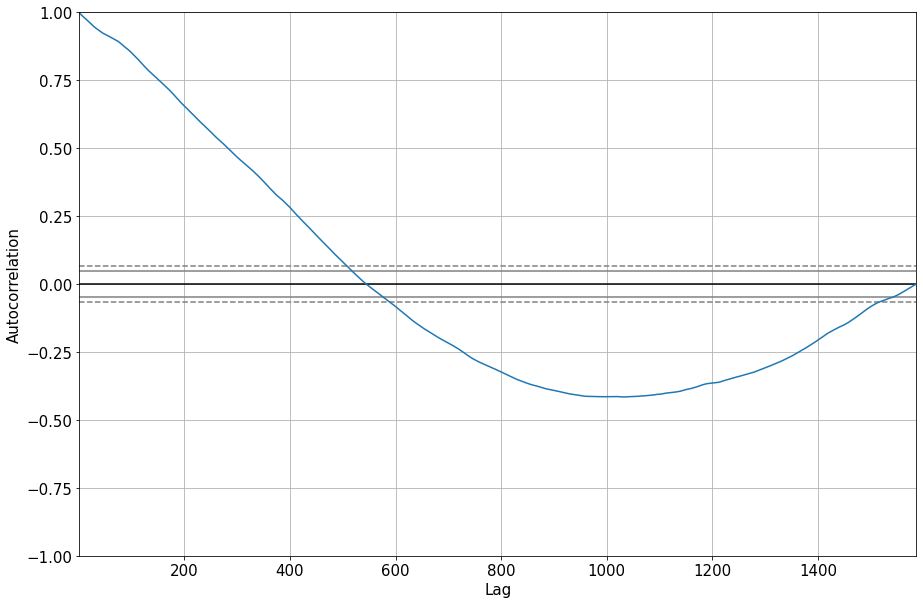

In [427]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(close_series)

In this plot we can see that the close price is highly correlated with itself in the first part of the graph. The correlation decreases with the increase of the lag as we can expect.
This is intuitive as the close price is a variable that we expect to be correlated with itself for small lags.

There is an interesting negative correlation in the second half of the plot. This could suggest a trend of stock markets to rebalance themselves every three-four years. This could also be an effect of the econimic crisis.

This suggestes that there is an association between time and close price.

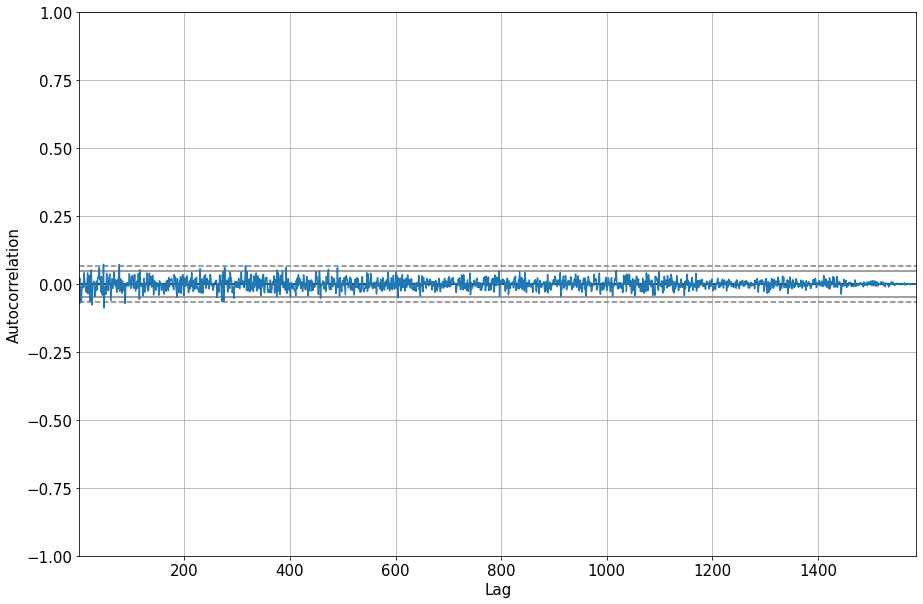

In [428]:
autocorrelation_plot(return_series)

This plot shows that the return of NASDAQ is not correlated with itself in the past and therefore we will rely on other features to predict our target.

---

Now let's look at the correlation among the features.

First we will plot the correlation matrix among features of the same category.

In [429]:
primitive_indices = ["Close","mom"]

These are the features that resemble our target, therefore we will see the correlation of these with all the other features grouped by cathegory

### Technical indicators

Let's see the correlation between primitive features and technincal indicators.

In [430]:
technical_indeces.remove("mom")
correlation_matrix = nasdaq_train_val[primitive_indices + technical_indeces].corr()
correlation_matrix

,Close,mom,Volume,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200
Close,1.000000,0.013161,-0.011268,0.012950,0.013817,0.011290,0.030924,0.038706,0.043148,0.041405,0.998540,0.996993,0.993306,0.979900
mom,0.013161,1.000000,-0.108134,-0.016773,0.022035,-0.069554,0.422672,0.285440,0.240468,0.202192,-0.015352,-0.021869,-0.016100,-0.017654
Volume,-0.011268,-0.108134,1.000000,-0.003307,0.033640,0.013937,-0.037671,-0.013203,-0.027852,-0.037264,-0.006736,-0.006284,-0.008496,-0.012860
mom1,0.012950,-0.016773,-0.003307,1.000000,-0.016750,0.022016,0.422485,0.286032,0.245355,0.202210,-0.010861,-0.017482,-0.014904,-0.017184
mom2,0.013817,0.022035,0.033640,-0.016750,1.000000,-0.016665,0.464974,0.294239,0.254517,0.217310,-0.005034,-0.014936,-0.013651,-0.017302
mom3,0.011290,-0.069554,0.013937,0.022016,-0.016665,1.000000,0.426354,0.271127,0.237996,0.190382,-0.001915,-0.012700,-0.013477,-0.017970
ROC_5,0.030924,0.422672,-0.037671,0.422485,0.464974,0.426354,1.000000,0.651907,0.557919,0.461700,-0.014659,-0.035387,-0.032125,-0.039907
ROC_10,0.038706,0.285440,-0.013203,0.286032,0.294239,0.271127,0.651907,1.000000,0.776096,0.675935,-0.004512,-0.033586,-0.045388,-0.063019
ROC_15,0.043148,0.240468,-0.027852,0.245355,0.254517,0.237996,0.557919,0.776096,1.000000,0.827647,0.004394,-0.025975,-0.052894,-0.077817
ROC_20,0.041405,0.202192,-0.037264,0.202210,0.217310,0.190382,0.461700,0.675935,0.827647,1.000000,0.007143,-0.020521,-0.058151,-0.093433


In [431]:
correlation_matrix["mom"].sort_values(ascending=False)

mom        1.000000
ROC_5      0.422672
ROC_10     0.285440
ROC_15     0.240468
ROC_20     0.202192
mom2       0.022035
Close      0.013161
EMA_10    -0.015352
EMA_50    -0.016100
mom1      -0.016773
EMA_200   -0.017654
EMA_20    -0.021869
mom3      -0.069554
Volume    -0.108134
Name: mom, dtype: float64

In [432]:
correlation_matrix["Close"].sort_values(ascending=False)

Close      1.000000
EMA_10     0.998540
EMA_20     0.996993
EMA_50     0.993306
EMA_200    0.979900
ROC_15     0.043148
ROC_20     0.041405
ROC_10     0.038706
ROC_5      0.030924
mom2       0.013817
mom        0.013161
mom1       0.012950
mom3       0.011290
Volume    -0.011268
Name: Close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2ab2389b0>,
      dtype=object)

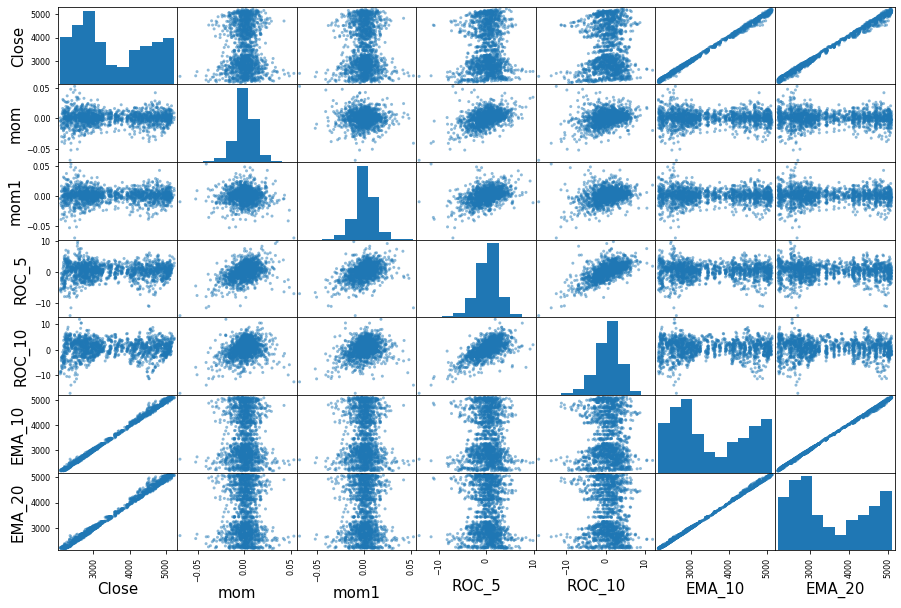

In [433]:
from pandas.plotting import scatter_matrix

attributes = ["Close", "mom","mom1", "ROC_5", "ROC_10", "EMA_10","EMA_20"]
scatter_matrix(nasdaq_train_val[attributes])

We see that the close price is very correlated with all the EMA features and the return closely correlates with the ROC features.

### Economic indicators

In [434]:
correlation_matrix = nasdaq_train_val[primitive_indices + economic_indices].corr()
correlation_matrix

,Close,mom,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y
Close,1.000000,0.013161,-0.140384,-0.146324,0.084550,0.046720,-0.321696,-0.371742,-0.426038,-0.308606,-0.307973,-0.333942,-0.038684,0.277159,-0.195090,-0.203514,-0.454384,-0.423785,-0.421950,0.018982,0.016861,0.008552
mom,0.013161,1.000000,0.000515,0.000126,-0.020002,0.002118,0.009458,0.008784,0.004862,0.009435,0.009508,0.012547,-0.000833,-0.032349,-0.008831,-0.006234,0.008046,0.004996,0.004919,0.016548,0.106094,0.126057
DTB4WK,-0.140384,0.000515,1.000000,0.907245,0.792518,0.089288,0.079501,0.131336,0.271920,-0.020307,-0.018317,-0.044046,-0.045227,0.243808,0.382639,0.316265,0.162926,0.186707,0.183222,0.042106,0.071746,0.078514
DTB3,-0.146324,0.000126,0.907245,1.000000,0.904716,0.138286,0.114980,0.167665,0.337785,0.024558,0.007344,-0.026125,0.379140,0.516519,0.464320,0.368843,0.214367,0.245005,0.259279,0.056368,0.086419,0.093466
DTB6,0.084550,-0.020002,0.792518,0.904716,1.000000,0.197716,0.059810,0.108481,0.312782,-0.019298,-0.037864,-0.095966,0.405232,0.784668,0.543922,0.410653,0.174139,0.229058,0.244585,0.083578,0.102466,0.109504
DGS5,0.046720,0.002118,0.089288,0.138286,0.197716,1.000000,0.889013,0.755180,0.625489,0.882719,0.879934,0.855730,0.132008,0.223660,-0.223847,-0.318462,0.618785,0.630060,0.630533,0.140037,0.216721,0.237949
DGS10,-0.321696,0.009458,0.079501,0.114980,0.059810,0.889013,1.000000,0.928366,0.791311,0.995015,0.994185,0.987863,0.098187,0.014301,-0.217353,-0.218184,0.811403,0.803266,0.800857,0.184384,0.284083,0.318466
DAAA,-0.371742,0.008784,0.131336,0.167665,0.108481,0.755180,0.928366,1.000000,0.922319,0.917982,0.916364,0.908858,0.109278,0.039010,-0.053366,0.097033,0.939918,0.932791,0.929789,0.292802,0.435856,0.486958
DBAA,-0.426038,0.004862,0.271920,0.337785,0.312782,0.625489,0.791311,0.922319,1.000000,0.766456,0.759956,0.740400,0.204044,0.220998,0.336657,0.424033,0.989780,0.995295,0.995851,0.347553,0.510346,0.567914
TE1,-0.308606,0.009435,-0.020307,0.024558,-0.019298,0.882719,0.995015,0.917982,0.766456,1.000000,0.998969,0.995202,0.103003,-0.010048,-0.256278,-0.250472,0.797512,0.786972,0.784904,0.180724,0.277754,0.311564


In [435]:
correlation_matrix["mom"].sort_values(ascending=False)

mom       1.000000
CTB1Y     0.126057
CTB6M     0.106094
CTB3M     0.016548
Close     0.013161
TE3       0.012547
TE2       0.009508
DGS10     0.009458
TE1       0.009435
DAAA      0.008784
DE4       0.008046
DE5       0.004996
DE6       0.004919
DBAA      0.004862
DGS5      0.002118
DTB4WK    0.000515
DTB3      0.000126
TE5      -0.000833
DE2      -0.006234
DE1      -0.008831
DTB6     -0.020002
TE6      -0.032349
Name: mom, dtype: float64

In [436]:
correlation_matrix["Close"].sort_values(ascending=False)

Close     1.000000
TE6       0.277159
DTB6      0.084550
DGS5      0.046720
CTB3M     0.018982
CTB6M     0.016861
mom       0.013161
CTB1Y     0.008552
TE5      -0.038684
DTB4WK   -0.140384
DTB3     -0.146324
DE1      -0.195090
DE2      -0.203514
TE2      -0.307973
TE1      -0.308606
DGS10    -0.321696
TE3      -0.333942
DAAA     -0.371742
DE6      -0.421950
DE5      -0.423785
DBAA     -0.426038
DE4      -0.454384
Name: Close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2ab238e48>,
      dtype=object)

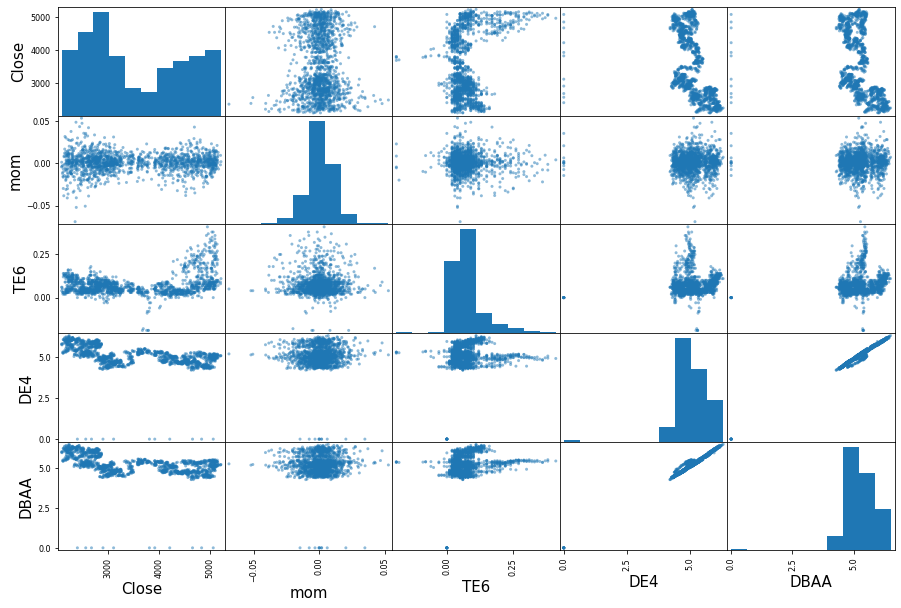

In [437]:
attributes = ["Close", "mom", "TE6", "DE4", "DBAA"]
scatter_matrix(nasdaq_train_val[attributes])

We can see many otther significant correlations in the data

### Word indices

In [438]:
correlation_matrix = nasdaq_train_val[primitive_indices + word_indices].corr()
correlation_matrix

,Close,mom,GSPC,DJI,NYSE,RUT,HSI,SSEC,FCHI,FTSE,GDAXI
Close,1.000000,0.013161,0.008516,0.005252,0.003352,-0.002501,0.009781,0.038348,0.019246,-0.000397,0.010870
mom,0.013161,1.000000,0.957004,0.910326,0.920707,0.934170,0.227250,0.160957,0.624372,0.615035,0.621112
GSPC,0.008516,0.957004,1.000000,0.977023,0.980936,0.920757,0.212040,0.141986,0.663368,0.655497,0.650377
DJI,0.005252,0.910326,0.977023,1.000000,0.958752,0.874119,0.204410,0.131946,0.667839,0.662310,0.658623
NYSE,0.003352,0.920707,0.980936,0.958752,1.000000,0.916206,0.251728,0.156987,0.697693,0.690107,0.675278
RUT,-0.002501,0.934170,0.920757,0.874119,0.916206,1.000000,0.190366,0.128614,0.594675,0.584461,0.595792
HSI,0.009781,0.227250,0.212040,0.204410,0.251728,0.190366,1.000000,0.537265,0.375158,0.416957,0.366131
SSEC,0.038348,0.160957,0.141986,0.131946,0.156987,0.128614,0.537265,1.000000,0.174730,0.207577,0.162856
FCHI,0.019246,0.624372,0.663368,0.667839,0.697693,0.594675,0.375158,0.174730,1.000000,0.889692,0.933846
FTSE,-0.000397,0.615035,0.655497,0.662310,0.690107,0.584461,0.416957,0.207577,0.889692,1.000000,0.859446


In [439]:
correlation_matrix["mom"].sort_values(ascending=False)

mom      1.000000
GSPC     0.957004
RUT      0.934170
NYSE     0.920707
DJI      0.910326
FCHI     0.624372
GDAXI    0.621112
FTSE     0.615035
HSI      0.227250
SSEC     0.160957
Close    0.013161
Name: mom, dtype: float64

In [440]:
correlation_matrix["Close"].sort_values(ascending=False)

Close    1.000000
SSEC     0.038348
FCHI     0.019246
mom      0.013161
GDAXI    0.010870
HSI      0.009781
GSPC     0.008516
DJI      0.005252
NYSE     0.003352
FTSE    -0.000397
RUT     -0.002501
Name: Close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2a9e8de48>,
      dtype=object)

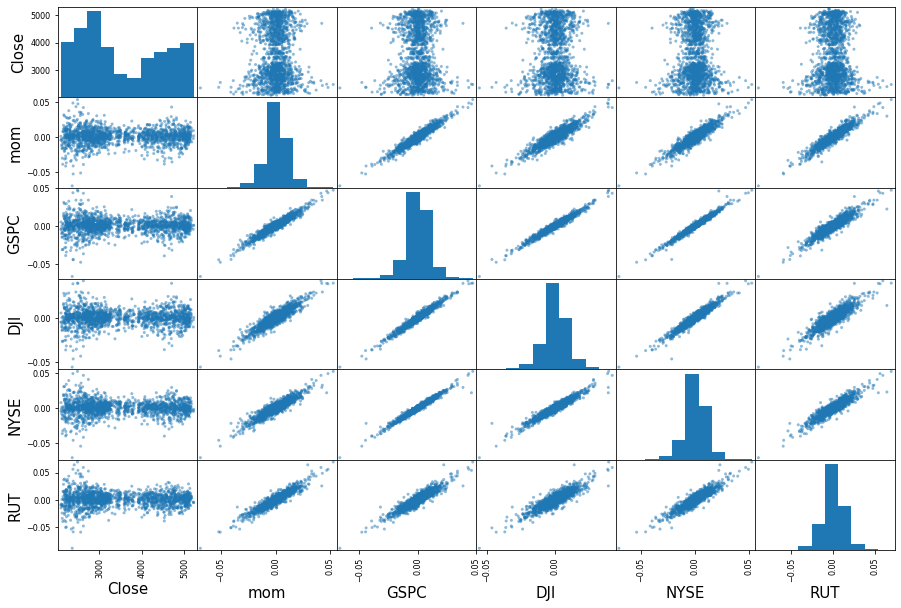

In [441]:
attributes = primitive_indices + word_indices[:4]
scatter_matrix(nasdaq_train_val[attributes])

Here we can se that all the returns from the stock markets are very closely correlated with each other.

### All features

Now we look at the correlation between the primitive features and all other features.

In [442]:
correlation_matrix = nasdaq_train_val.corr()
correlation_matrix

,day_of_week,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Oil,Brent,WIT-oil,Gold,gold-F,...,silver-F,copper-F,wheat-F,GSPC,DJI,NYSE,RUT,HSI,SSEC,FCHI,FTSE,GDAXI,JPY,GBP,CAD,CNY,AUD,NZD,CHF,EUR,Dollar index,Dollar index-F,XOM,JPM,AAPL,MSFT,GE,JNJ,WFC,AMZN,CAC-F,FTSE-F,DAX-F,HSI-F,Nikkei-F,KOSPI-F,NASDAQ-F,DJI-F,S&P-F,RUSSELL-F
day_of_week,1.000000,-0.012143,0.036965,-0.000538,0.012834,0.015087,0.009849,0.000494,0.000615,-0.006653,-0.007641,-0.014136,-0.012308,-0.009594,-0.010995,0.001967,-0.038527,-0.030977,0.008916,0.021236,0.045196,0.053371,0.021102,0.025554,0.025996,-0.095834,-0.051262,0.027785,0.053733,0.059983,0.058942,0.054336,-0.122205,0.040197,0.066030,0.002934,0.038427,0.006047,0.114516,-0.017844,...,0.015526,0.040392,0.007072,0.004454,0.000514,0.014728,0.011159,0.054141,0.017566,0.025803,0.018223,0.006300,0.035487,0.039729,-0.028495,0.013418,-0.005112,0.043289,-0.022606,0.013199,0.026536,0.016359,-0.022330,0.001860,-0.109330,0.009357,0.025402,-0.037219,0.021702,0.047504,0.044035,0.035365,0.010408,0.049752,0.031316,-0.022613,-0.004584,0.026998,0.024065,0.003713
Close,-0.012143,1.000000,-0.011268,0.013161,0.012950,0.013817,0.011290,0.030924,0.038706,0.043148,0.041405,0.998540,0.996993,0.993306,0.979900,-0.140384,-0.146324,0.084550,0.046720,-0.321696,-0.371742,-0.426038,-0.308606,-0.307973,-0.333942,-0.038684,0.277159,-0.195090,-0.203514,-0.454384,-0.423785,-0.421950,0.018982,0.016861,0.008552,-0.030307,-0.031793,-0.029138,-0.007477,-0.021682,...,-0.005397,-0.020317,-0.012872,0.008516,0.005252,0.003352,-0.002501,0.009781,0.038348,0.019246,-0.000397,0.010870,0.006151,0.010778,0.013959,0.067556,-0.025396,-0.024885,0.014106,-0.009906,0.018261,0.018401,-0.012332,0.018136,-0.009278,0.040555,0.007187,0.018140,0.005241,0.025894,0.015351,-0.005074,0.010063,0.003176,0.016234,-0.011907,0.011671,0.001422,0.007044,0.008845
Volume,0.036965,-0.011268,1.000000,-0.108134,-0.003307,0.033640,0.013937,-0.037671,-0.013203,-0.027852,-0.037264,-0.006736,-0.006284,-0.008496,-0.012860,0.001818,0.003246,0.013207,-0.007798,-0.001690,0.020361,0.036153,-0.001877,-0.002054,-0.003743,0.003711,0.019164,0.043770,0.060158,0.035495,0.036909,0.036763,-0.017014,-0.004974,0.011748,-0.071829,-0.062738,-0.074112,0.078118,0.035804,...,0.031609,-0.046376,-0.017123,-0.106289,-0.111014,-0.104246,-0.080054,-0.037151,-0.045307,-0.096902,-0.114208,-0.083199,-0.031255,-0.048548,0.067724,0.023994,-0.061822,-0.031725,-0.003001,-0.036053,0.034303,0.032085,-0.068639,-0.053999,-0.064177,-0.051640,-0.085418,-0.060710,-0.059079,-0.065067,-0.077432,-0.099410,-0.082091,-0.045228,-0.016217,-0.019405,-0.092936,-0.076953,-0.084694,-0.088742
mom,-0.000538,0.013161,-0.108134,1.000000,-0.016773,0.022035,-0.069554,0.422672,0.285440,0.240468,0.202192,-0.015352,-0.021869,-0.016100,-0.017654,0.000515,0.000126,-0.020002,0.002118,0.009458,0.008784,0.004862,0.009435,0.009508,0.012547,-0.000833,-0.032349,-0.008831,-0.006234,0.008046,0.004996,0.004919,0.016548,0.106094,0.126057,0.338667,0.359178,0.355937,-0.013443,0.024722,...,0.163477,0.377114,0.136444,0.957004,0.910326,0.920707,0.934170,0.227250,0.160957,0.624372,0.615035,0.621112,0.079560,0.131143,-0.249093,-0.052187,0.538462,0.456287,-0.009017,0.247549,-0.217677,-0.212775,0.664104,0.709344,0.642520,0.681261,0.710741,0.624293,0.733060,0.600249,0.604830,0.607417,0.611141,0.246801,0.200413,0.232341,0.962628,0.883515,0.933641,0.907180
mom1,0.012834,0.012950,-0.003307,-0.016773,1.000000,-0.016750,0.022016,0.422485,0.286032,0.245355,0.202210,-0.010861,-0.017482,-0.014904,-0.017184,-0.011544,-0.009034,-0.021269,-0.000718,0.008204,0.014359,0.013790,0.009388,0.009242,0.011498,0.003939,-0.022102,0.000650,0.009860,0.017495,0.015139,0.015184,0.026916,-0.018016,-0.017999,0.018083,0.021755,0.005666,-0.002883,-0.010106,...,0.054499,0.018879,-0.005973,-0.045329,-0.047410,-0.037379,-0.056509,0.433049,0.176511,0.14178

In [443]:
correlation_matrix["mom"].sort_values(ascending=False)

mom               1.000000
NASDAQ-F          0.962628
GSPC              0.957004
RUT               0.934170
S&P-F             0.933641
                    ...   
mom3             -0.069554
Volume           -0.108134
Dollar index-F   -0.212775
Dollar index     -0.217677
CAD              -0.249093
Name: mom, Length: 83, dtype: float64

In [444]:
correlation_matrix["Close"].sort_values(ascending=False)

Close      1.000000
EMA_10     0.998540
EMA_20     0.996993
EMA_50     0.993306
EMA_200    0.979900
             ...   
DAAA      -0.371742
DE6       -0.421950
DE5       -0.423785
DBAA      -0.426038
DE4       -0.454384
Name: Close, Length: 83, dtype: float64

As we can see the return is very correlated with the returns of other stock markets.

The close price is very correlated with the exponential moving average and negatively correlated with economic features.

## 6 - Data transformations

Now that we have explred the attributes and their correlation we can build a machine learning pipeline to prepare our data for the machine learning algorithms.

### Missing values

In our dataset there are some missing values. Therefore we need to define a strategy to treat them.

Given the fact that we are working with time series we use the interpolation function provided by pandas, which interpolates the missing values using the time index.

Then to fill the remaining missing values in the first rows of the dataset, we perform backwards filling using pandas' 

```
bfill()
```

function.

In [445]:
nasdaq_train = nasdaq_train.interpolate(method='time')
nasdaq_train = nasdaq_train.bfill()

nasdaq_val = nasdaq_val.interpolate(method='time')
nasdaq_val = nasdaq_val.bfill()

nasdaq_test = nasdaq_test.interpolate(method='time')
nasdaq_test = nasdaq_test.bfill()

### Categorical features

In the dataset we have just one categorical feature which is "day_of_week"

It is already expressed as an int, with the following mapping:

*   0 -> Monday
*   1 -> Tuesday
*   2 -> Wednesday
*   3 -> Thursday
*   4 -> Friday

In this case we do not need to map it to a one-hot encoding, as we want the alogrithm to benefit from the similarity given from this encoding of the days of the week.

Note that we never have data on Saturdays and Sundays, as in those days the stock market is closed.




### Feature scaling

Finalyy, we want to standardise our features as they have various different ranges.

To do this we perform standrad scaling of the features.

In [446]:
from sklearn.preprocessing import StandardScaler

nasdaq_train = pd.DataFrame(data=StandardScaler().fit_transform(nasdaq_train), columns=nasdaq_train.columns, index=nasdaq_train.index)

nasdaq_val = pd.DataFrame(data=StandardScaler().fit_transform(nasdaq_val), columns=nasdaq_val.columns, index=nasdaq_val.index)

nasdaq_test = pd.DataFrame(data=StandardScaler().fit_transform(nasdaq_test), columns=nasdaq_test.columns, index=nasdaq_test.index)

<a name="transforming_the_dataset"/>

### Transfrming the dataset for supervised learning

Now that we have prepared our data, we can build the dataset fro our prediction task.

To do this we will make use of the following functions:

In [447]:
def series_to_supervised(data, n_in, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in - 1, -1, -1):
        cols.append(df.shift(i))
        if i != 0:
            names += [f'{feature}(t-{i})' for feature in nasdaq_df.columns]
        else:
            names += [f'{feature}(t)' for feature in nasdaq_df.columns]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [448]:
n = 60

In [449]:
nasdaq_train_y = nasdaq_train_y[n-1:]
nasdaq_train_X = series_to_supervised(nasdaq_train.values, n)

nasdaq_train_X

,day_of_week(t-59),Close(t-59),Volume(t-59),mom(t-59),mom1(t-59),mom2(t-59),mom3(t-59),ROC_5(t-59),ROC_10(t-59),ROC_15(t-59),ROC_20(t-59),EMA_10(t-59),EMA_20(t-59),EMA_50(t-59),EMA_200(t-59),DTB4WK(t-59),DTB3(t-59),DTB6(t-59),DGS5(t-59),DGS10(t-59),DAAA(t-59),DBAA(t-59),TE1(t-59),TE2(t-59),TE3(t-59),TE5(t-59),TE6(t-59),DE1(t-59),DE2(t-59),DE4(t-59),DE5(t-59),DE6(t-59),CTB3M(t-59),CTB6M(t-59),CTB1Y(t-59),Oil(t-59),Brent(t-59),WIT-oil(t-59),Gold(t-59),gold-F(t-59),...,silver-F(t),copper-F(t),wheat-F(t),GSPC(t),DJI(t),NYSE(t),RUT(t),HSI(t),SSEC(t),FCHI(t),FTSE(t),GDAXI(t),JPY(t),GBP(t),CAD(t),CNY(t),AUD(t),NZD(t),CHF(t),EUR(t),Dollar index(t),Dollar index-F(t),XOM(t),JPM(t),AAPL(t),MSFT(t),GE(t),JNJ(t),WFC(t),AMZN(t),CAC-F(t),FTSE-F(t),DAX-F(t),HSI-F(t),Nikkei-F(t),KOSPI-F(t),NASDAQ-F(t),DJI-F(t),S&P-F(t),RUSSELL-F(t)
59,0.694812,-1.230191,1.972537,1.468759,1.465999,1.463239,1.461329,0.741663,0.062238,-0.899760,-1.248399,-1.178647,-1.226911,-1.239294,-1.139481,-0.417058,-0.341011,1.470037,2.319381,1.958575,1.544304,1.591357,2.017239,2.024582,1.894549,0.175506,2.825131,0.266273,-0.601609,1.533614,1.664089,1.657155,-0.658833,-0.376463,-0.092437,1.585042,-0.109109,0.044542,0.143076,0.249459,...,1.034073,2.700194,-0.046425,0.505453,0.403469,0.729437,0.296473,0.728862,1.811800,0.209258,0.116714,0.434282,0.503068,2.421866,-1.444712,-0.035211,1.980563,1.145908,-0.431866,0.815045,-0.857203,-0.944324,0.976674,-0.222841,0.311517,-0.202867,0.187240,0.753761,-0.266679,-0.024503,0.209646,0.251675,0.586614,0.444673,0.578560,0.007352,0.338687,0.265428,0.386509,0.037158
60,-1.449129,-1.171933,1.972537,1.468759,1.465999,1.463239,1.461329,0.741663,0.062238,-0.899760,-1.248399,-1.178647,-1.226911,-1.239294,-1.139481,-0.217909,0.082006,1.113982,2.248310,1.958575,1.575219,1.591357,2.002126,1.994137,1.925322,0.539689,2.006376,0.188761,-0.601609,1.564747,1.633383,1.641934,-0.658833,-0.376463,-0.092437,1.585042,1.900304,1.641817,0.143076,1.565793,...,-0.126833,0.475586,0.930774,-0.050396,0.063605,-0.091396,0.130833,0.535551,0.119423,-0.250495,-0.712821,-0.227081,1.187558,1.490554,-0.652821,0.033141,0.146905,0.289232,0.466664,-0.795043,0.286478,0.299672,-0.360774,-0.370244,0.809488,0.401039,-0.418212,0.090201,-0.530427,0.476570,-0.195586,-0.755197,-0.138436,0.687859,0.645622,0.362411,0.183866,0.200371,0.008399,0.175315
61,-0.734482,-1.171502,0.746560,-0.047147,1.465999,1.463239,1.461329,0.741663,0.062238,-0.899760,-1.248399,-1.178647,-1.226911,-1.239294,-1.139481,-0.616208,-0.129502,0.935954,2.088400,1.839320,1.405187,1.457225,1.911451,1.887579,1.817616,0.903871,2.279294,0.266273,-0.626055,1.440215,1.510560,1.535385,-0.358027,-0.668986,-0.304229,0.144321,0.382992,0.179179,0.154137,0.018523,...,0.562160,-0.165743,-2.310668,-0.377125,-0.556708,-0.200181,-0.588809,-0.546634,-0.549226,-0.254069,0.110221,0.101219,0.526968,1.460500,-1.447973,0.101506,-0.257579,-0.501547,-1.744004,1.251111,-1.072992,-1.176255,-0.124791,0.181215,-0.282147,-1.187308,-0.420266,0.491661,0.487973,-0.332796,-0.342943,-0.339992,-0.260635,-0.544842,-0.166574,-0.321727,-0.517383,-0.623692,-0.398797,-0.602727
62,-0.019835,-1.182807,-0.259552,-0.349450,-0.049254,1.463239,1.461329,0.741663,0.062238,-0.899760,-1.248399,-1.178647,-1.226911,-1.239294,-1.139481,-0.616208,-0.341011,0.579899,2.159471,1.958575,1.497932,1.516840,2.032351,2.024582,1.971482,0.539689,1.733457,0.188761,-0.723838,1.533614,1.587324,1.596270,-0.778271,0.057936,0.245843,0.991175,1.080136,1.035954,0.185673,1.211691,...,1.010477,0.582474,0.616163,0.675991,0.652449,1.097923,0.510244,1.173348,1.061561,1.107267,1.159174,1.013475,1.138858,-1.096399,0.378729,0.052674,0.618802,-0.092978,0.295515,0.882132,-0.792466,-0.838900,0.798544,0.499073,0.174248,-0.351520,0.456452,0.979820,0.426906,-1.456539,1.167468,1.310447,1.132438,1.090374,0.839356,1.392948,-0.235062,0.579874,0.657973,0.487987
63,0.694812,-1.184350,-0.054999,-0.098113,-0.351427,-0.050714,1.461329,0.741663,0.062238,-0.899760,-1.248399,-1.178647,-1.226911,-1.239294,-1.1394

In [450]:
nasdaq_train_X = nasdaq_train_X.values
nasdaq_train_X = nasdaq_train_X.reshape(-1, n, nasdaq_train.shape[1])

nasdaq_train_X.shape, nasdaq_train_y.shape

((1130, 60, 83), (1130, 1))

In [451]:
nasdaq_val_y = nasdaq_val_y[n-1:]
nasdaq_val_X = series_to_supervised(nasdaq_val.values, 60)
nasdaq_val_X = nasdaq_val_X.values
nasdaq_val_X = nasdaq_val_X.reshape(-1, n, nasdaq_val.shape[1])

nasdaq_val_X.shape, nasdaq_val_y.shape

((338, 60, 83), (338, 1))

In [452]:
nasdaq_test_y = nasdaq_test_y[n-1:]
nasdaq_test_X = series_to_supervised(nasdaq_test.values, 60)
nasdaq_test_X = nasdaq_test_X.values
nasdaq_test_X = nasdaq_test_X.reshape(-1, n, nasdaq_test.shape[1])

nasdaq_test_X.shape, nasdaq_test_y.shape

((338, 60, 83), (338, 1))